In [1]:
import pandas as pd

In [2]:
df = pd.read_excel(r"C:\Users\LENOVO\Desktop\coffee raw\Coffee Shop Sales.xlsx")

First Glimpse at the Dataset

In [3]:
df.head(10)

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.00,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.50,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
5,6,2023-01-01,07:22:41,1,5,Lower Manhattan,77,3.00,Bakery,Scone,Oatmeal Scone
6,7,2023-01-01,07:25:49,1,5,Lower Manhattan,22,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm
7,8,2023-01-01,07:33:34,2,5,Lower Manhattan,28,2.00,Coffee,Gourmet brewed coffee,Columbian Medium Roast Sm
8,9,2023-01-01,07:39:13,1,5,Lower Manhattan,39,4.25,Coffee,Barista Espresso,Latte Rg
9,10,2023-01-01,07:39:34,2,5,Lower Manhattan,58,3.50,Drinking Chocolate,Hot chocolate,Dark chocolate Rg


In [4]:
df.shape

(149116, 11)

Checking The Dataset Summary: Data Types and Non-Null Counts

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   transaction_id    149116 non-null  int64         
 1   transaction_date  149116 non-null  datetime64[ns]
 2   transaction_time  149116 non-null  object        
 3   transaction_qty   149116 non-null  int64         
 4   store_id          149116 non-null  int64         
 5   store_location    149116 non-null  object        
 6   product_id        149116 non-null  int64         
 7   unit_price        149116 non-null  float64       
 8   product_category  149116 non-null  object        
 9   product_type      149116 non-null  object        
 10  product_detail    149116 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(5)
memory usage: 12.5+ MB


Generating Descriptive Statistics: Summary of Numerical Data

In [6]:
df.describe()

,transaction_id,transaction_qty,store_id,product_id,unit_price
count,149116.000000,149116.000000,149116.000000,149116.000000,149116.000000
mean,74737.371872,1.438276,5.342063,47.918607,3.382219
std,43153.600016,0.542509,2.074241,17.930020,2.658723
min,1.000000,1.000000,3.000000,1.000000,0.800000
25%,37335.750000,1.000000,3.000000,33.000000,2.500000
50%,74727.500000,1.000000,5.000000,47.000000,3.000000
75%,112094.250000,2.000000,8.000000,60.000000,3.750000
max,149456.000000,8.000000,8.000000,87.000000,45.000000


Counting Unique Values per Column

In [7]:
df.nunique()

transaction_id      149116
transaction_date       181
transaction_time     25762
transaction_qty          6
store_id                 3
store_location           3
product_id              80
unit_price              41
product_category         9
product_type            29
product_detail          80
dtype: int64

Preview of Items with the Highest Unit Prices

In [8]:
df.sort_values(by = "unit_price", ascending = False).head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
87829,88083,2023-05-08,09:29:02,1,8,Hell's Kitchen,8,45.0,Coffee beans,Premium Beans,Civet Cat
65393,65563,2023-04-13,10:51:56,1,8,Hell's Kitchen,8,45.0,Coffee beans,Premium Beans,Civet Cat
54634,54745,2023-03-31,10:51:56,1,8,Hell's Kitchen,8,45.0,Coffee beans,Premium Beans,Civet Cat
88226,88480,2023-05-08,13:25:10,1,3,Astoria,8,45.0,Coffee beans,Premium Beans,Civet Cat
112132,112390,2023-05-30,09:29:02,1,8,Hell's Kitchen,8,45.0,Coffee beans,Premium Beans,Civet Cat


Exploring Relationships Among Numerical Variables

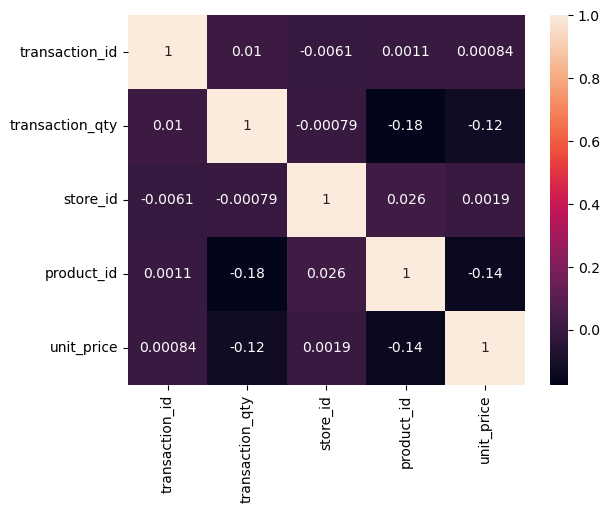

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

numeric_df = df.select_dtypes(include=[np.number])

sns.heatmap(numeric_df.corr(), annot = True)

plt.rcParams['figure.figsize'] = (14,7)

plt.show()

\* The heatmap indicates that there are no strong correlations between any pairs of numeric columns.
___________________________________________________________________

Checking for Outliers in Numerical Data

<AxesSubplot:>

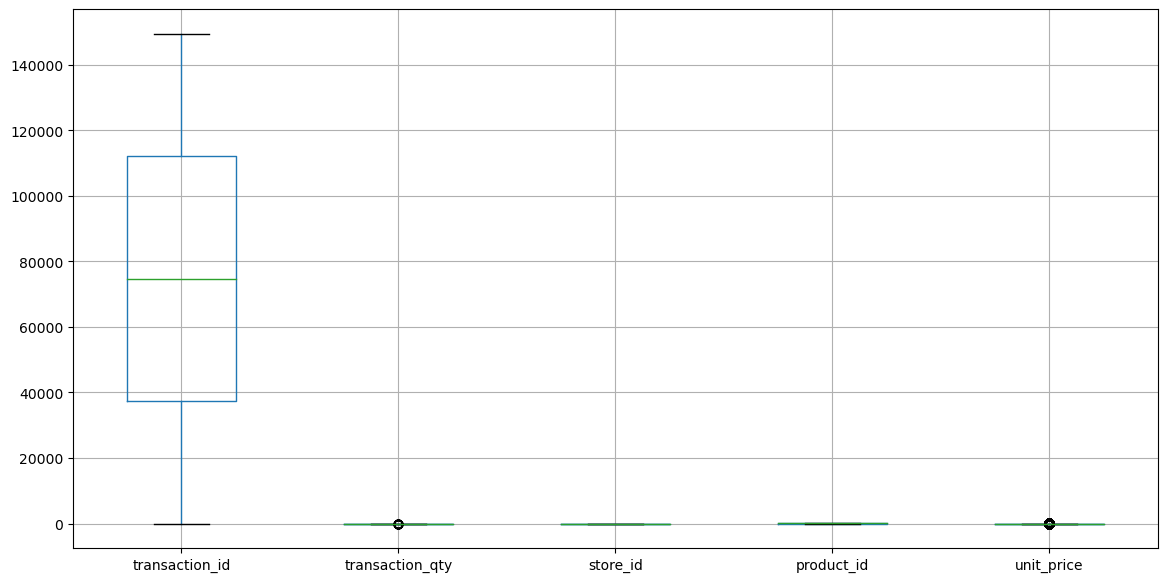

In [10]:
df.boxplot(figsize = (14,7))

\* No significant outliers were detected in the dataset based on the boxplot analysis.
___________________________________________________________________

What are the Top 10 Best-Selling Products in June 2023?

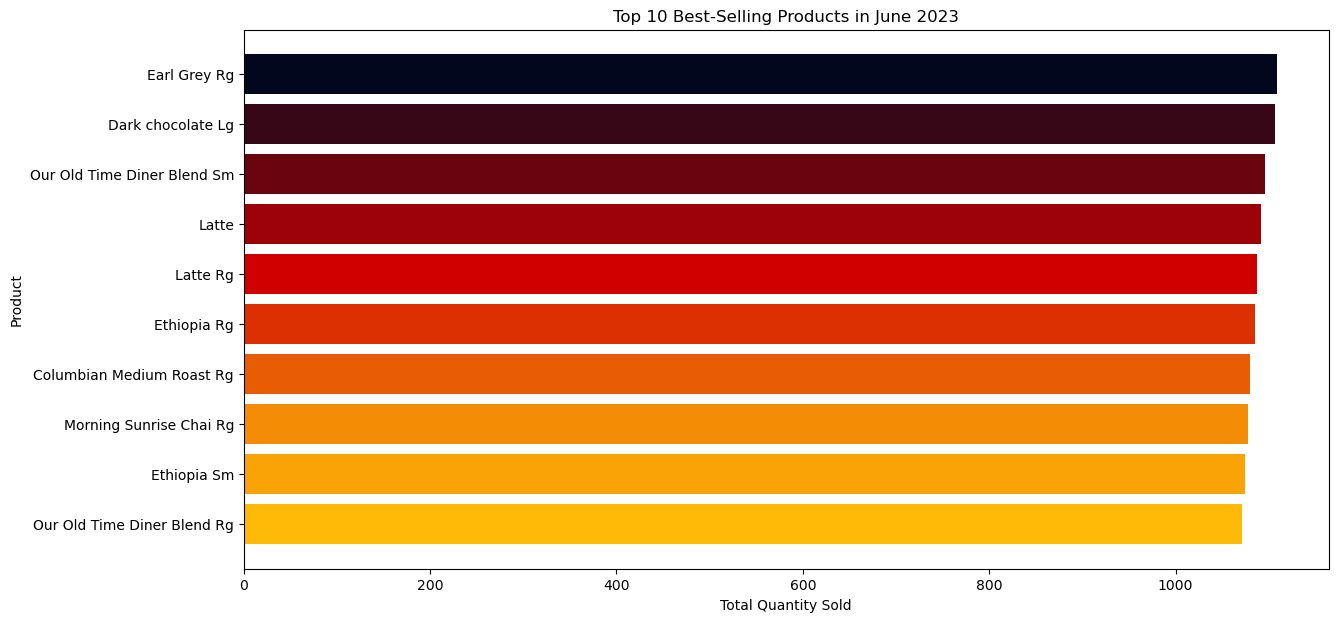

In [11]:
june_2023_data = df[(df['transaction_date'].dt.year == 2023) & (df['transaction_date'].dt.month == 6)]

june_top_selling_products = june_2023_data.groupby('product_detail')['transaction_qty'].sum().reset_index()
june_top_selling_products = june_top_selling_products.sort_values(by='transaction_qty', ascending = False).head(10)

colors = ['#03071e', '#370617', '#6a040f', '#9d0208', '#d00000', '#dc2f02', '#e85d04', '#f48c06', '#faa307', '#ffba08']
plt.barh(june_top_selling_products['product_detail'], june_top_selling_products['transaction_qty'], color=colors)
plt.xlabel('Total Quantity Sold')
plt.ylabel('Product')
plt.title('Top 10 Best-Selling Products in June 2023')
plt.gca().invert_yaxis()
plt.show()

--> It appears that 'Earl Grey Tea', 'Dark Chocolate Large', and 'Our Old Time Dinner Blend Small' were the most favored products in June 2023.
___________________________________________________________________

Which Store Has Sold the Most Items So Far?

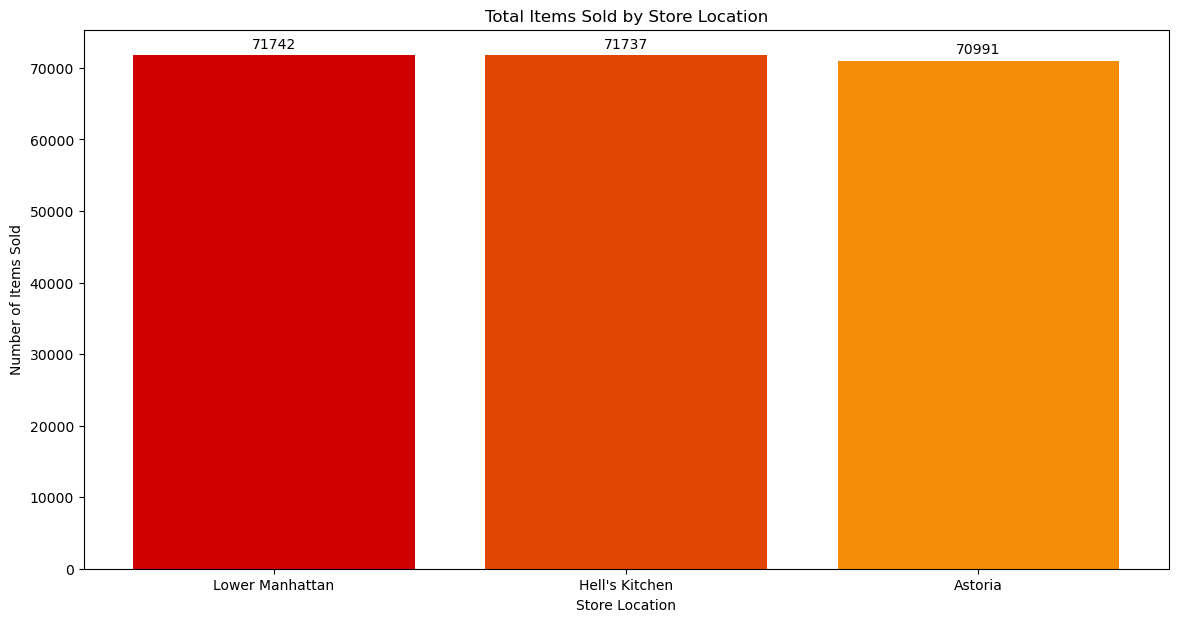

In [12]:
most_transactions = df.groupby('store_location')['transaction_qty'].sum().reset_index()
most_transactions = most_transactions.sort_values(by='transaction_qty', ascending=False)

fig, ax = plt.subplots()
colors = ['#D00000','#E24603','#F48C06']
bars = ax.bar(most_transactions['store_location'], most_transactions['transaction_qty'], color=colors)

ax.bar_label(bars, padding=3)

plt.xlabel('Store Location')
plt.ylabel('Number of Items Sold')
plt.title('Total Items Sold by Store Location')

plt.show()

--> 'Lower Manhattan' location has made the most transactions so far.
___________________________________________________________________

Which Store Location Generates the Highest Revenue?

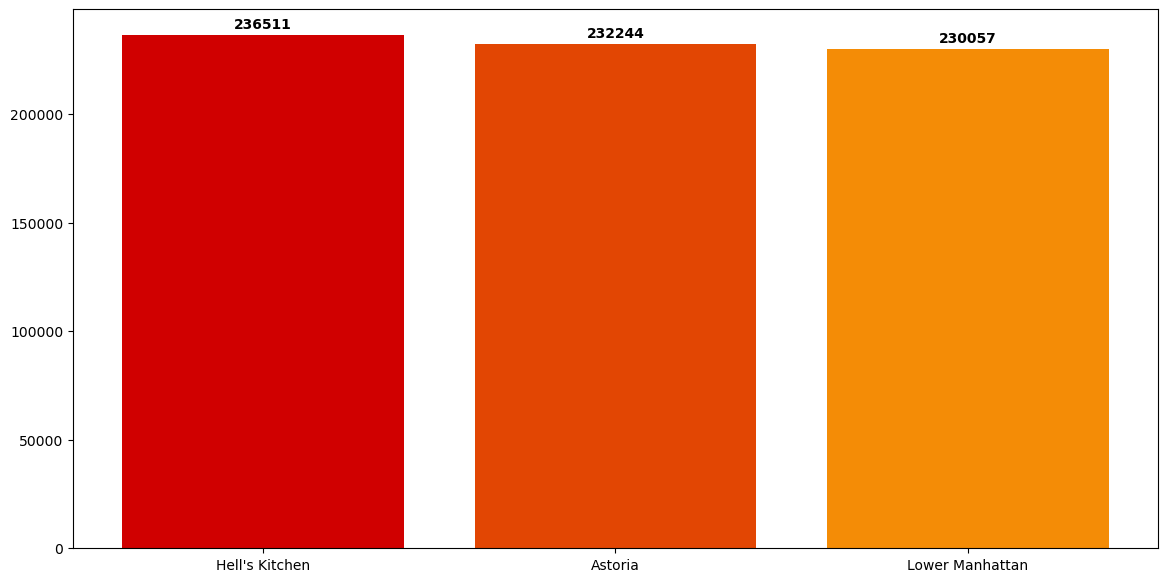

In [13]:
df['revenue'] = df['transaction_qty'] * df['unit_price']

revenue_by_location = df.groupby('store_location')['revenue'].sum().reset_index()
revenue_by_location = revenue_by_location.sort_values(by='revenue', ascending=False)

fig, ax = plt.subplots()
colors = ['#D00000','#E24603','#F48C06']
bars = ax.bar(revenue_by_location['store_location'], revenue_by_location['revenue'], color=colors)

ax.bar_label(bars, padding=3, fontsize=10, fontweight='bold')

plt.show()

--> "Hell's Kitchen" has generated the highest revenue so far, while "Lower Manhattan" has generated the lowest.  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Notice that "Lower Manhattan" has generated the lowest revenue, but it is the same location that made the most transactions.
___________________________________________________________________

How Do Sales Vary by Time of Day?

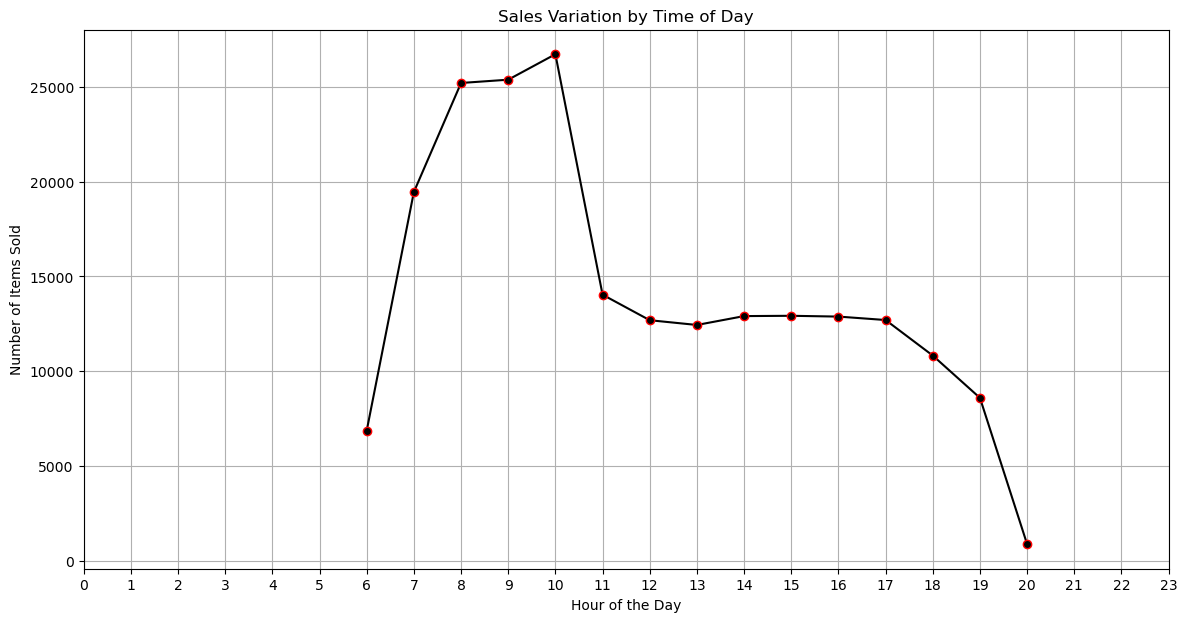

In [14]:
df['transaction_time_hour'] = df['transaction_time'].apply(lambda x: x.hour)
sales_by_hour = df.groupby('transaction_time_hour')['transaction_qty'].sum().reset_index()

fig, ax = plt.subplots()

ax.plot(sales_by_hour['transaction_time_hour'], sales_by_hour['transaction_qty'], marker='o', linestyle='-', color='black', markeredgecolor='red')

plt.xlabel('Hour of the Day')
plt.ylabel('Number of Items Sold')
plt.title('Sales Variation by Time of Day')

plt.grid(True)
plt.xticks(range(0, 24))
plt.show()

--> Sales peak between 8 AM and 10 AM, showing the highest number of items sold during these hours.
___________________________________________________________________

How is Sales Distributed Across Product Categories?

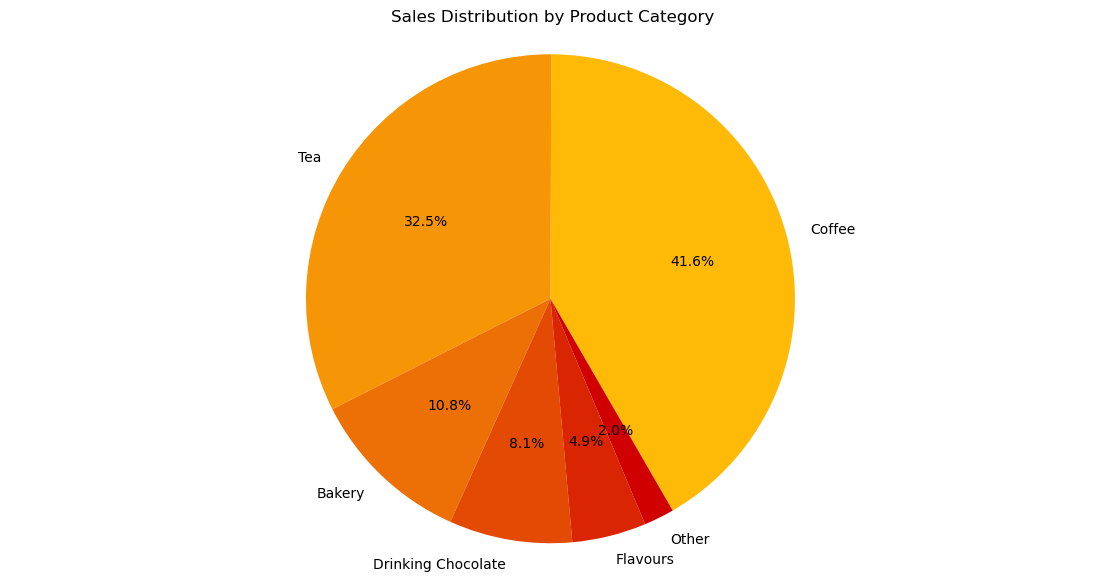

In [15]:
sales_by_category = df.groupby('product_category')['transaction_qty'].sum().reset_index()

sales_by_category = sales_by_category.sort_values(by='transaction_qty', ascending=False)

top_categories = sales_by_category.iloc[:5]
other_categories = sales_by_category.iloc[5:]
other_sum = other_categories['transaction_qty'].sum()

other_row = pd.DataFrame([{'product_category': 'Other', 'transaction_qty': other_sum}])
sales_by_category = pd.concat([top_categories, other_row])

colors = ['#FFBA08','#F69506','#EC7005','#E34A03','#D92502','#D00000',]
fig, ax = plt.subplots()
ax.pie(sales_by_category['transaction_qty'], labels=sales_by_category['product_category'], autopct='%1.1f%%',
       colors=colors, startangle=300)

ax.axis('equal')
plt.title('Sales Distribution by Product Category')
plt.show()

--> It seems that people prefer coffee the most, making it the leading product category in sales.
___________________________________________________________________

Which Product is Most Popular at Each Store Location?

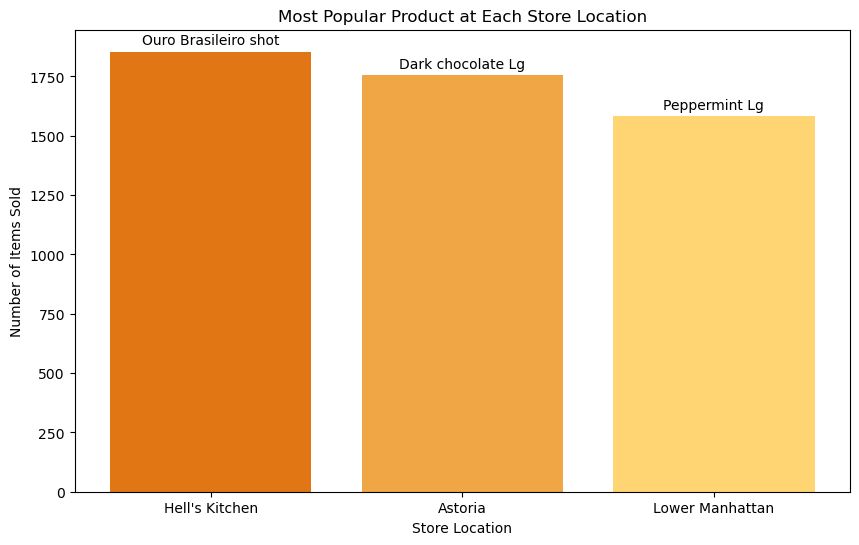

In [16]:
popularity_by_product = df.groupby(['store_location', 'product_detail'])['transaction_qty'].sum().reset_index()

popularity_by_product = popularity_by_product.sort_values(['store_location', 'transaction_qty'], ascending=[True, False])

most_popular_product = popularity_by_product.groupby('store_location').first().reset_index()

most_popular_product = most_popular_product.sort_values(by='transaction_qty', ascending=False)

fig, ax = plt.subplots(figsize=(10, 6))

colors = ['#E17714','#F0A644','#FFD573']
bars = ax.bar(most_popular_product['store_location'], most_popular_product['transaction_qty'], color=colors)

ax.bar_label(bars, labels=most_popular_product['product_detail'], padding=3)

plt.xlabel('Store Location')
plt.ylabel('Number of Items Sold')
plt.title('Most Popular Product at Each Store Location')

plt.show()

--> t seems people have distinct preferences at each store location, as the most popular product varies from one place to another.
___________________________________________________________________